# Lab 3 MA course in Artificial Intelligence 2020/2021



In [ ]:
!rm -r AI2020
!git clone https://github.com/UmbertoJr/AI2020.git

rm: cannot remove 'AI2020': No such file or directory
Cloning into 'AI2020'...
remote: Enumerating objects: 242, done.
remote: Counting objects: 100% (242/242), done.
remote: Compressing objects: 100% (163/163), done.
remote: Total 242 (delta 127), reused 186 (delta 73), pack-reused 0
Receiving objects: 100% (242/242), 567.51 KiB | 8.35 MiB/s, done.
Resolving deltas: 100% (127/127), done.


name: d198
nPoints: 198
best_sol: 15780.0


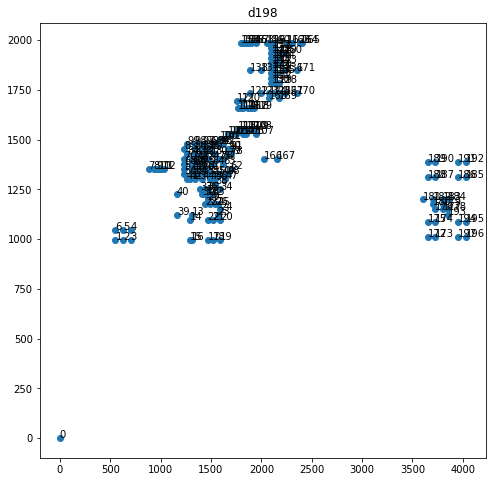

[[   0. 1139. 1177. ... 4172. 4153. 4079.]
 [1139.    0.   76. ... 3478. 3477. 3401.]
 [1177.   76.    0. ... 3402. 3401. 3325.]
 ...
 [4172. 3478. 3402. ...    0.   76.  108.]
 [4153. 3477. 3401. ...   76.    0.   76.]
 [4079. 3401. 3325. ...  108.   76.    0.]]


In [ ]:
from AI2020.IO_manager.io_tsp import TSP_Instance_Creator

ic = TSP_Instance_Creator("standard", 'd198.tsp') 
ic.print_info()
ic.plot_data()
print(ic.dist_matrix)

In [ ]:
def random_method(dist_matrix):
  n = int(dist_matrix.shape[0])
  solution = np.random.choice(np.arange(n), size=n, replace=False)
  return np.concatenate([solution, [solution[0]]])


def nn(dist_matrix, starting_node=0):
  dist_matrix = np.copy(dist_matrix)
  n = int(dist_matrix.shape[0])
  node = starting_node
  tour = [node]
  for _ in range(n - 1):
    for new_node in np.argsort(dist_matrix[node]):
      if new_node not in tour:
        tour.append(new_node)
        node = new_node
        break
  tour.append(starting_node)
  return np.array(tour)

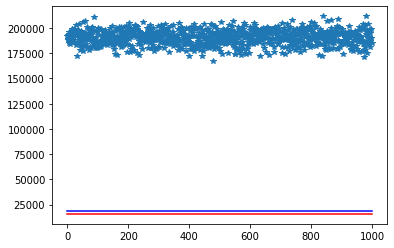

best gap with random 961.93% on 1000 tials,
with a total time of 1.81 seconds
best gap with NN 20.25% on 1 tial,
with a total time of 0.01 seconds


In [17]:
from AI2020.solvers.TSP_solver import Solver_TSP
from time import time as t
import numpy as np
import matplotlib.pyplot as plt

number_of_trials = 1000
found_lens = []
start = t()
solver = Solver_TSP(('random', random_method))
for _ in range(number_of_trials):
  solver(ic)
  found_lens.append(solver.found_length)
end = t()

solver = Solver_TSP(('nearest neighbor', nn))
solver(ic)

plt.plot(found_lens, "*")
plt.plot(np.ones(1000)*ic.best_sol, "r-")
plt.plot(np.ones(1000)*solver.found_length, "b-")
plt.show()
print(f"best gap with random {np.round(100*(min(found_lens) - ic.best_sol)/ic.best_sol, 2)}% on {number_of_trials} tials,\nwith a total time of {np.round(end - start, 2)} seconds")
print(f"best gap with NN {solver.gap}% on 1 tial,\nwith a total time of {np.round(solver.time_to_solve, 2)} seconds")


## 2-opt

In [21]:
import numpy as np


class TwoOpt:
  @staticmethod
  def loop2opt(solution, matrix_dist):
    new_len = compute_lenght(solution, matrix_dist)
    new_tsp_sequence = np.copy(np.array(solution))
    num_LS_steps = 0
    while True:
      new_tsp_sequence, new_reward, uncr_ = TwoOpt.step2opt(new_tsp_sequence, matrix_dist, new_len)
      num_LS_steps += uncr_
      if new_reward < new_len:
        new_len = new_reward
      else:
        return new_tsp_sequence.tolist(), new_len, num_LS_steps


    @staticmethod
    def step2opt(solution, matrix_dist, distance):
      # you must implement best or first 2opt neigh
        seq_length = len(solution) - 1
        tsp_sequence = np.array(solution)
        uncrosses = 0
        for i in range(1, seq_length):
            for j in range(i + 1, seq_length):
                new_tsp_sequence = TwoOpt.swap2opt(tsp_sequence, i, j)
                new_distance = distance + TwoOpt.gain(i, j, tsp_sequence, matrix_dist)
                if new_distance < distance:
                    #### to fill
                    pass
                    
        return tsp_sequence, distance, uncrosses

    @staticmethod
    def swap2opt(tsp_sequence, i, j):
        ##### to fill
        return new_tsp_sequence

    @staticmethod
    def gain(i, j, tsp_sequence, matrix_dist):
        ##### to fill
        return - old_link_len + changed_links_len



In [ ]:
number_of_trials = 100
found_lens = []
start = t()
solver = Solver_TSP(('random', random_method))
solver.bind(('2-opt', TwoOpt.loop2opt))

for _ in range(number_of_trials):
  solver(ic)
  found_lens.append(solver.found_length)
end = t()

solver = Solver_TSP(('nearest neighbor', nn))
solver(ic)

plt.plot(found_lens, "*")
plt.plot(np.ones(number_of_trials)*ic.best_sol, "r-")
plt.plot(np.ones(number_of_trials)*solver.found_length, "b-")
plt.show()
print(f"best gap with random {np.round(100*(min(found_lens) - ic.best_sol)/ic.best_sol, 2)}% on {number_of_trials} tials,\nwith a total time of {np.round(end - start, 2)} seconds")
print(f"best gap with NN {solver.gap}% on 1 tial,\nwith a total time of {np.round(solver.time_to_solve, 2)} seconds")


## Double Bridge



In [ ]:
class DoubleBridge:
  
  @staticmethod
  def perturbate_solution(solution):
    ### to fill
    return new_solution

## Iterated Local Search

In [25]:
class ILS_better:

  def solve(solution, matrix):

    return new_solution, new_len, uncrosses


class ILS_RW:

  def solve(solution, matrix):

    return new_solution, new_len, uncrosses

class ILS_LSMC:

  def solve(solution, matrix):

    return new_solution, new_len, uncrosses

In [26]:
import pandas as pd
verbose = False
show_plots = False


names = ["eil76.tsp"] #"d198.tsp" , "kroA100.tsp"
initializers = ["random"] 
init_functions = random_method
improvements = ["ILS better","ILS RW","ILS LSMC"]
improve_functions = [ILS_better.solve, ILS_RW.solve, ILS_LSMC.solve]
results = []
index = []
for name in names:
  instance = TSP_Instance_Creator("standard", name)
  for i, init in enumerate(initializers):
    for j, improve in enumerate(improvements):
      solver = Solver_TSP((init, init_functions[i]))
      solver.bind((improve, improve_functions[j]))
      solver(instance)
      index.append((name, instance.best_sol, solver.name_method))
      results.append([solver.found_length, solver.gap, solver.time_to_solve, solver.ls_steps])
          

index = pd.MultiIndex.from_tuples(index, names=['problem','optimal lenght', 'method'])

pd.DataFrame(results, index=index, columns=["tour length", "gap", "time to solve", "steps Local Search"])

TypeError: ignored

In [ ]:
""